In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from skimage.feature import hog

In [3]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
X = digits['data']
images = digits['images']
y = digits['target']

print('Features of Instance 1:', X[0])
print('Target of Instance 1:', y[0])

Features of Instance 1: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Target of Instance 1: 0


In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

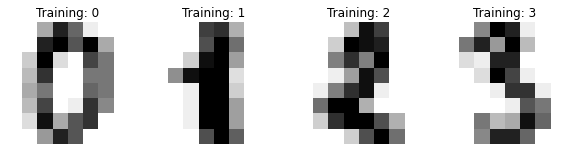

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [9]:
print("Few pixel values BEFORE normalization: \n", images[0,0:5,0:5])
images  = images / 255.0
print("\nFew pixel values AFTER normalization: \n", images[0,0:5,0:5])

Few pixel values BEFORE normalization: 
 [[ 0.  0.  5. 13.  9.]
 [ 0.  0. 13. 15. 10.]
 [ 0.  3. 15.  2.  0.]
 [ 0.  4. 12.  0.  0.]
 [ 0.  5.  8.  0.  0.]]

Few pixel values AFTER normalization: 
 [[0.         0.         0.01960784 0.05098039 0.03529412]
 [0.         0.         0.05098039 0.05882353 0.03921569]
 [0.         0.01176471 0.05882353 0.00784314 0.        ]
 [0.         0.01568627 0.04705882 0.         0.        ]
 [0.         0.01960784 0.03137255 0.         0.        ]]


In [10]:
#flatten
n_samples = len(digits.images)
color_feature_vectors = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma='scale', kernel = 'rbf')

#Split data into 50% train and 50% test subsets
train_images, test_images, train_labels, test_labels = train_test_split(
    color_feature_vectors, digits.target, test_size=0.5, shuffle=False
)

clf.fit(train_images, train_labels)

predicted = clf.predict(test_images)



C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


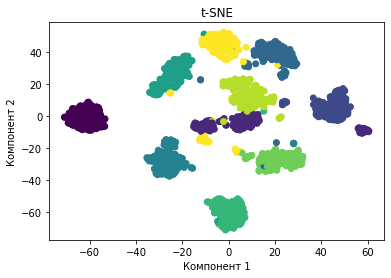

In [11]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(color_feature_vectors)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')
plt.title('t-SNE')
plt.show()

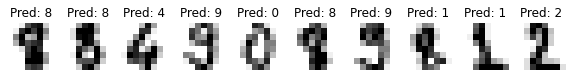

In [12]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, test_images, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {prediction}")

In [13]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(test_labels, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.97      0.97        91
           2       1.00      0.98      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.92      0.95      0.94        88
           9       0.92      0.96      0.94        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  1  2]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  1  3]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  2  0  0  0  1  0  0 84  1]
 [ 0  0  0  1  0  2  0  1  0 88]]


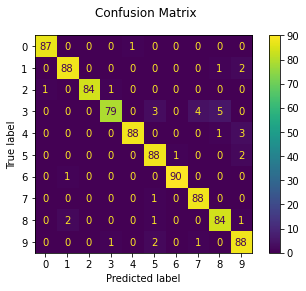

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_labels, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.97      0.97        91
           2       1.00      0.98      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.92      0.95      0.94        88
           9       0.92      0.96      0.94        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




In [16]:
hog_feature_vectors = []
for image in images:
    hog_features = hog(image, orientations=9, pixels_per_cell=(1, 1), cells_per_block=(4, 4)) 
    #print(hog_features)
    '''for j in hog_features:
        if j!=0:
            print(j)'''
    hog_feature_vectors.append(hog_features)

hog_feature_vectors = np.array(hog_feature_vectors) 
print(len(hog_features))
#hog_feature_vectors = hog_feature_vectors.reshape(len(hog_feature_vectors), -1)
print(hog_feature_vectors)
final_feature_vectors = np.concatenate((color_feature_vectors, hog_feature_vectors), axis=1)

3600
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(len(hog_feature_vectors[0]))
print(len(color_feature_vectors[0]))
print(len(final_feature_vectors[0]))

3600
64
3664


In [18]:
train_images, test_images, train_labels, test_labels = train_test_split(final_feature_vectors, digits.target, test_size=0.2)

clf_hog = svm.SVC(gamma='scale', kernel = 'rbf') 
clf_hog.fit(train_images, train_labels)

SVC()

In [19]:
predicted_hog = clf_hog.predict(test_images)

Confusion matrix:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  1  0]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  3  0  0  0  0  0  0 37  0]
 [ 0  1  0  0  0  0  0  0  2 25]]


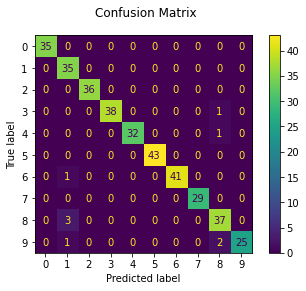

In [20]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_labels, predicted_hog)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [21]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.88      1.00      0.93        35
           2       1.00      1.00      1.00        36
           3       1.00      0.97      0.99        39
           4       1.00      0.97      0.98        33
           5       1.00      1.00      1.00        43
           6       1.00      0.98      0.99        42
           7       1.00      1.00      1.00        29
           8       0.90      0.93      0.91        40
           9       1.00      0.89      0.94        28

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360


